First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Column Names:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad'

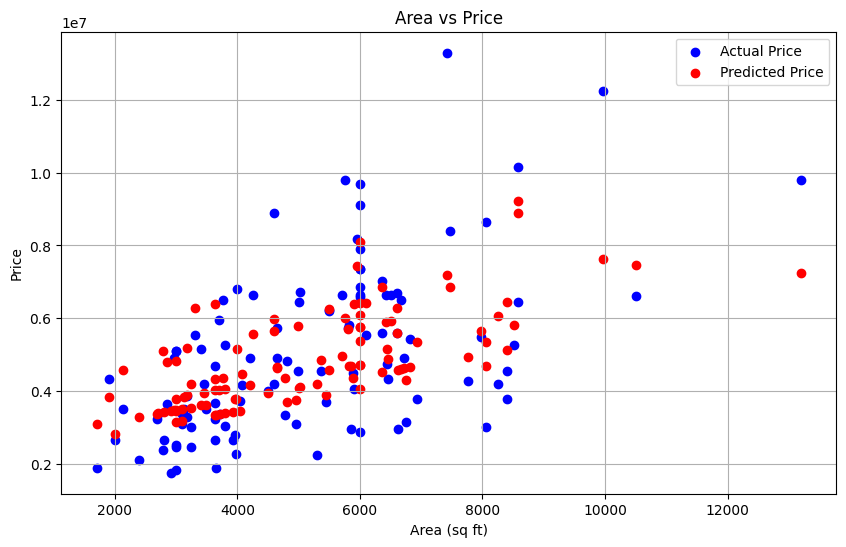

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Dataset
data = pd.read_csv(r'C:\Users\TANYA\OneDrive\Desktop\archive\Housing.csv')

# Cleaning column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Quick Look at Data
print("First 5 rows:")
print(data.head())

# Checking actual column names
print("\nColumn Names:")
print(data.columns)

# Checking for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Feature Selection
# Based on the actual columns in Housing.csv from Kaggle, typical names are:
# ['area', 'bedrooms', 'bathrooms', 'parking', 'price']
# Adjusted accordingly:
X = data[['area', 'bedrooms', 'bathrooms', 'parking']]
y = data['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

# Coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print(f"Intercept: {model.intercept_}")

# Plotting (for simple linear regression case: area vs price)
plt.figure(figsize=(10,6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Price')
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
